In [7]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import math as m

In [8]:
#1a // LGM method: m=(2^31)-1, a=7^5, b=0
def generate_random_sequence(seed, n):
    rand_sequence = [seed]
    for i in range(1, n + 1):
        rand_sequence.append(7**5 * rand_sequence[i-1] % (2**31 - 1)) 
    return rand_sequence[1:]

rand_sequence = generate_random_sequence(seed = 3, n = 10000)
new_rand_seq = list(map(lambda x: x / (2**31 - 1), rand_sequence))
mean_uniform = sum(new_rand_seq)/len(new_rand_seq)
var_uniform = sum(list(map(lambda x: (x - mean_uniform)**2 , new_rand_seq))) / len(new_rand_seq)
sd_uniform = var_uniform**(0.5)
print ("The emprical mean of the uniform distribution:" , round(mean_uniform, 5))
print ('The empirical standard deviation of the X distributions is :', round(sd_uniform, 5))

The emprical mean of the uniform distribution: 0.50278
The empirical standard deviation of the X distributions is : 0.28748


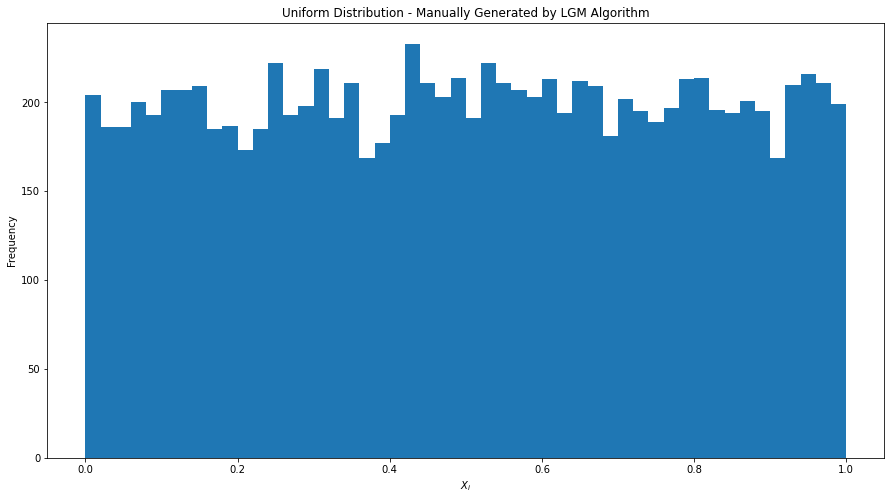

In [9]:
plt.figure(figsize=(15,8))
plt.hist(new_rand_seq, bins=50)
plt.xlabel('$X_i$')
plt.ylabel('Frequency')
plt.title('Uniform Distribution - Manually Generated by LGM Algorithm')
plt.show()

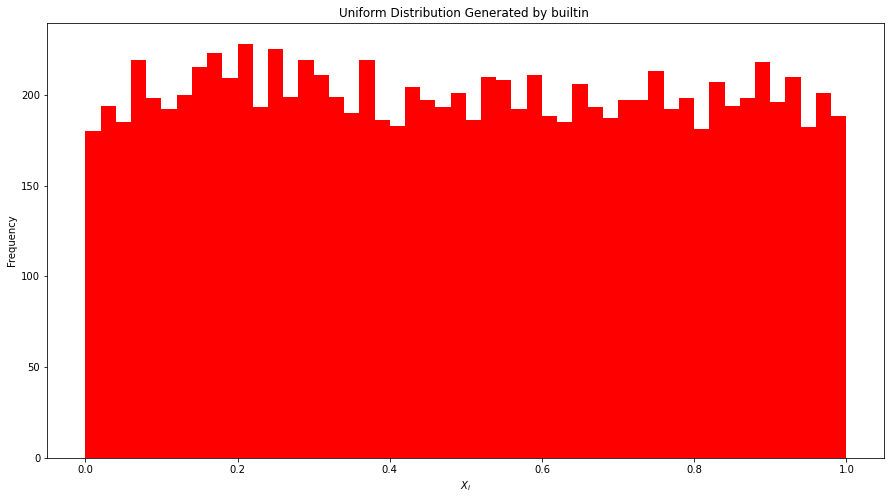

In [10]:
#1b using the built-in method to generate
np.random.seed(3)
rand_seq_builtin = np.random.uniform(size=10000)
plt.figure(figsize=(15,8))
plt.hist(rand_seq_builtin, bins=50, color='red' )
plt.xlabel('$X_i$')
plt.ylabel('Frequency')
plt.title('Uniform Distribution Generated by builtin ')
plt.show()

In [11]:
#1c 
mean_builtin = np.mean(rand_seq_builtin)
std_builtin = np.std(rand_seq_builtin)
print("The emprical mean of the uniform distribution:" , round(mean_builtin, 5))
print ('The empirical standard deviation of the X distributions is :', round(sd_uniform, 5))

The emprical mean of the uniform distribution: 0.49679
The empirical standard deviation of the X distributions is : 0.28748


Comparing the two methods of drawing random numebrs, no clear differences were detected, as both shapes of drawing look like uniform distributions. The empirical mean attained by manually input is slightly higher than the one attained by builtin function, with the standard deviation being the same.

In [12]:
#2a
# build cases maps:
def case_mapping(n):
    if n < 0.3:
        n = -1
    elif 0.3 < n <= (0.3 + 0.35):
        n = 0
    elif (0.3 + 0.35) < n  <=  (0.3 + 0.35 + 0.2):
        n = 1
    else: 
        n = 2 
    return n
discrete_seq = list(map(case_mapping, new_rand_seq))

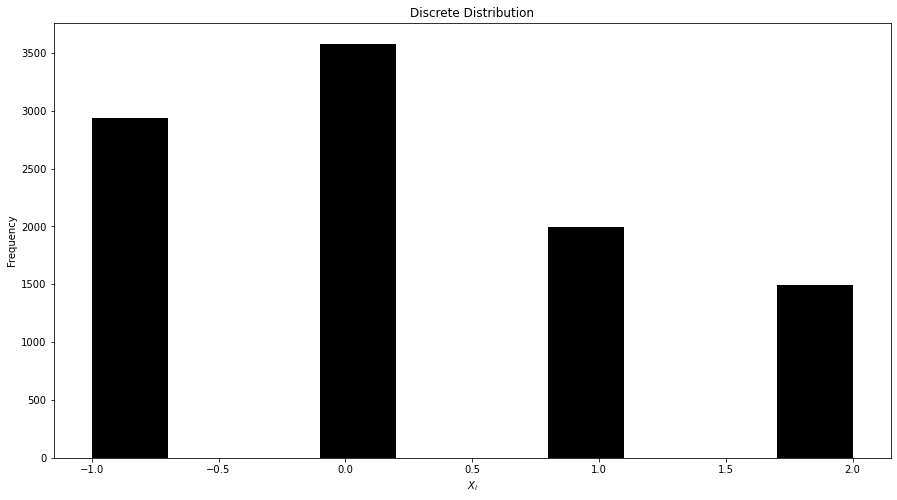

In [13]:
#2b
plt.figure(figsize=(15,8))
plt.hist(discrete_seq, color='black')
plt.title('Discrete Distribution')
plt.xlabel('$X_i$')
plt.ylabel('Frequency')
plt.show()

In [9]:
mean_dis = np.mean(discrete_seq)
sd_dis = np.std(discrete_seq)
print("The emprical mean of the uniform distribution:" , round(mean_dis, 5))
print ('The empirical standard deviation of the X distributions is :', round(sd_dis, 5))

The emprical mean of the uniform distribution: 0.205
The empirical standard deviation of the X distributions is : 1.02439


In [10]:
#3a Binomial -using n bernoulli to add to get
rand_sequence = generate_random_sequence(seed = 3, n = 44000)
new_rand_sequence = list(map(lambda x: x /  (2**31 - 1), rand_sequence))
p = 0.64
bernoulli = list(map(lambda x: 1 if x < p else 0, new_rand_sequence))
bernoulli_split = list(range(0, 44000, 44))
sublists = [bernoulli[i: i + 44] for i in bernoulli_split]
binomial = list(map(sum, sublists))

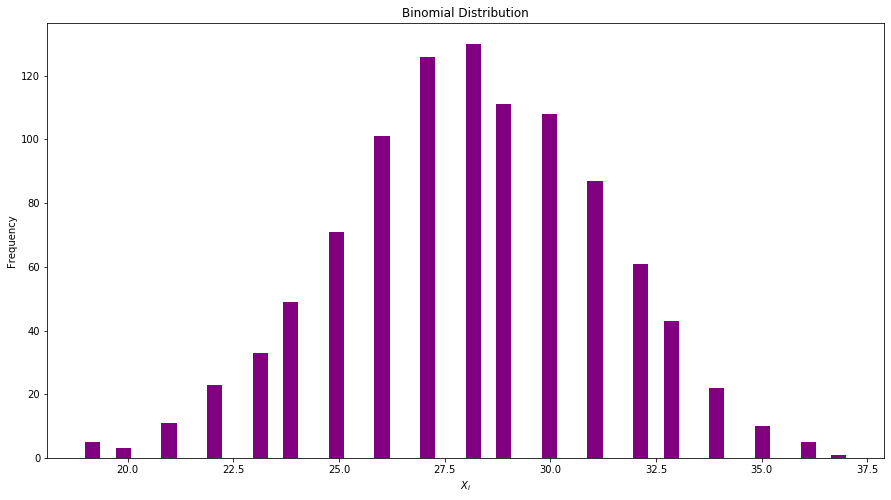

In [11]:
#3b
plt.figure(figsize=(15,8))
plt.hist(binomial, bins=50, color='purple')
plt.title('Binomial Distribution')
plt.xlabel('$X_i$')
plt.ylabel('Frequency')
plt.show()

In [12]:
greater_40 = list(map(lambda x: 1 if x >= 40 else 0, binomial))
n_greater_40 = sum(greater_40)
p_greater_40 = n_greater_40 / len(binomial)
print ("The probability that is at least 40: P(𝑋 ≥ 40) =" ,p_greater_40)
mean_bin = np.mean(binomial)
sd_bin = np.std(binomial)
print("The emprical mean of the distribution:" , round(mean_dis, 5))
print ('The empirical standard deviation of the distributions is :', round(sd_dis, 5))

The probability that is at least 40: P(𝑋 ≥ 40) = 0.0
The emprical mean of the distribution: 0.205
The empirical standard deviation of the distributions is : 1.02439


Using online binomial calculator, I also attain the result of P(𝑋 ≥ 40) = 0.0; It's fairly reasonable by observing that the mean is around 28 with std about 3, any result above 40 which is about 3 std away is unlikely to happen.

In [16]:
#4a Exponential Distribution
lamda = 1.5 
expotential = list(map(lambda y: -lamda * m.log(1-y), new_rand_seq))

In [17]:
#4b
greater_1 = list(map(lambda y: 1 if y >= 1 else 0, expotential))
greater_4 = list(map(lambda y: 1 if y >= 4 else 0, expotential))
p_greater_1 = sum(greater_1) / len(greater_1)
p_greater_4 = sum(greater_4) / len(greater_4)
print('𝑃(Y ≥ 1) = ', p_greater_1, '; 𝑃(Y ≥ 4) = ', p_greater_4)

𝑃(Y ≥ 1) =  0.5183 ; 𝑃(Y ≥ 4) =  0.072


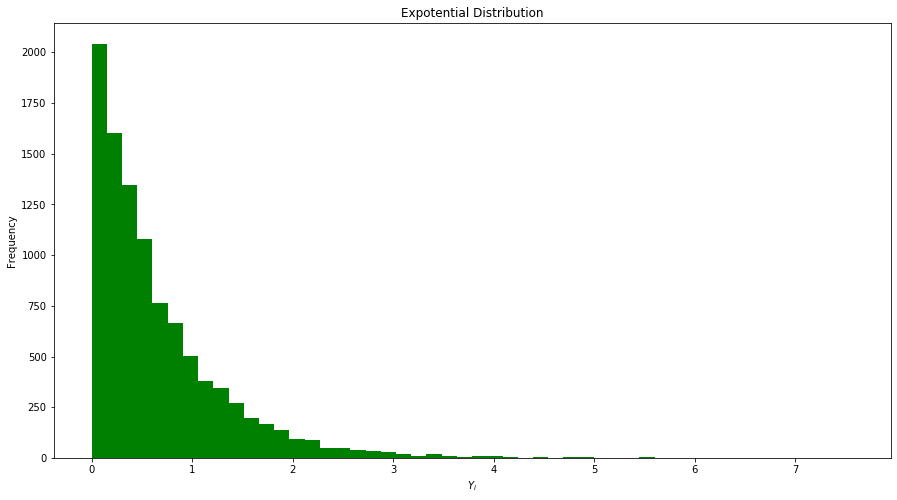

In [15]:
#4c
plt.figure(figsize=(15,8))
plt.hist(expotential, bins=50, color='green')
plt.title('Expotential Distribution')
plt.xlabel('$Y_i$')
plt.ylabel('Frequency')
plt.show()

In [16]:
mean_ex = np.mean(expotential)
sd_ex = np.std(expotential)
print("The emprical mean of the distribution:" , round(mean_dis, 5))
print ('The empirical standard deviation of the distributions is :', round(sd_dis, 5))

The emprical mean of the distribution: 0.205
The empirical standard deviation of the distributions is : 1.02439


In [33]:
#5a // Box-Muller & time counting
start_time = timeit.default_timer()
rand1 = generate_random_sequence(6,5000)
rand2 = generate_random_sequence(6,5000)
seq1 = list(map(lambda x1: x1 / (2**31 - 1), rand1))
seq2 = list(map(lambda x2: x2 / (2**31 - 1), rand2))
#box muller method
z1 = list(map(lambda seq1, seq2: m.sqrt(-2*m.log(seq1)) * m.sin(2*m.pi*seq2), seq1, seq2))
box_muller_time = timeit.default_timer() - start_time
mean_bm = np.mean(z1)
sd_bm = np.std(z1)
print("The emprical mean of the distribution:" , round(mean_bm, 5))
print ('The empirical standard deviation of the distributions is :', round(sd_bm, 5))

The emprical mean of the distribution: 0.30392
The empirical standard deviation of the distributions is : 0.88688


In [19]:
def generate_normal(n, u1, u2):
    z2 = []
    i = 0
    while n > 0:
        v1 = 2*u1[i] - 1
        v2 = 2*u2[i] - 1
        W = v1**2 + v2**2
        i += 1
        if W <= 1:
            A = m.sqrt(-2*m.log(W)/W)
            z2.append(v2 * A)
            n -= 1
        else:
            pass
        
    return z2
#Using 6500 because only 75% of the generation are useful
start_time = timeit.default_timer()
U1 = list(map(lambda x1: x1 / (2**31 - 1), generate_random_sequence(6,6666)))
U2 = list(map(lambda x1: x1 / (2**31 - 1), generate_random_sequence(3,6666)))
z2 = generate_normal(5000, U1, U2)
polar_marsaglia_time = timeit.default_timer() - start_time
mean_pm = np.mean(z2)
sd_pm = np.std(z2)
print("The emprical mean of the distribution:" , round(mean_pm, 5))
print ('The empirical standard deviation of the distributions is :', round(sd_pm, 5))

The emprical mean of the distribution: 0.00295
The empirical standard deviation of the distributions is : 1.05124


In [19]:
print ('Time using Box-Muller method: ', round(box_muller_time, 5))
print ('Time using Polar-Marsaglia method: ', round(polar_marsaglia_time, 5))

Time using Box-Muller method:  0.00761
Time using Polar-Marsaglia method:  0.01093


Box-Muller method is more efficient than the Polar-Marsaglia method, because Polar method needs to exclude the acceptance-rejection criteria (only about 75% of the result works).